In [166]:
import pandas as pd
import matplotlib.pyplot as plt

In [167]:
df=pd.read_csv('../datasets/student_performance_dataset.csv')
df.head()

,Student_ID,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities,Final_Exam_Score,Pass_Fail
0,S147,Male,31,68.267841,86,High School,Yes,Yes,63,Pass
1,S136,Male,16,78.222927,73,PhD,No,No,50,Fail
2,S209,Female,21,87.525096,74,PhD,Yes,No,55,Fail
3,S458,Female,27,92.076483,99,Bachelors,No,No,65,Pass
4,S078,Female,37,98.655517,63,Masters,No,Yes,70,Pass


In [168]:
df.isnull().sum()

Student_ID                    0
Gender                        0
Study_Hours_per_Week          0
Attendance_Rate               0
Past_Exam_Scores              0
Parental_Education_Level      0
Internet_Access_at_Home       0
Extracurricular_Activities    0
Final_Exam_Score              0
Pass_Fail                     0
dtype: int64

In [169]:
copy=df.drop(['Student_ID','Final_Exam_Score','Pass_Fail'],axis='columns')
copy.head()

,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities
0,Male,31,68.267841,86,High School,Yes,Yes
1,Male,16,78.222927,73,PhD,No,No
2,Female,21,87.525096,74,PhD,Yes,No
3,Female,27,92.076483,99,Bachelors,No,No
4,Female,37,98.655517,63,Masters,No,Yes


In [170]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
encoder=LabelEncoder()
scaler=MinMaxScaler()
copy['Gender']=encoder.fit_transform(copy['Gender'])
copy['Extracurricular_Activities']=encoder.fit_transform(copy['Extracurricular_Activities'])
copy['Internet_Access_at_Home']=encoder.fit_transform(copy['Internet_Access_at_Home'])
copy['Parental_Education_Level']=encoder.fit_transform(copy['Parental_Education_Level'])
# copy['Attendance_Rate']=scaler.fit_transform(copy['Attendance_Rate'])
# copy['Past_Exam_Scores']=scaler.fit_transform(copy['Past_Exam_Scores'])
# copy['Study_Hours_per_Week']=scaler.fit_transform(copy['Study_Hours_per_Week'])

copy.head()


,Gender,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Parental_Education_Level,Internet_Access_at_Home,Extracurricular_Activities
0,1,31,68.267841,86,1,1,1
1,1,16,78.222927,73,3,0,0
2,0,21,87.525096,74,3,1,0
3,0,27,92.076483,99,0,0,0
4,0,37,98.655517,63,2,0,1


<Axes: >

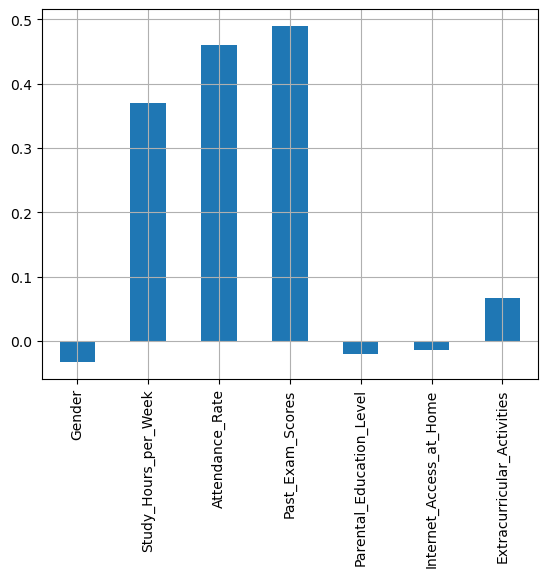

In [171]:
copy.corrwith(df['Final_Exam_Score']).plot.bar(grid=True)

In [172]:
copy=copy.drop(['Gender','Parental_Education_Level','Internet_Access_at_Home'],axis="columns")
copy.head()

,Study_Hours_per_Week,Attendance_Rate,Past_Exam_Scores,Extracurricular_Activities
0,31,68.267841,86,1
1,16,78.222927,73,0
2,21,87.525096,74,0
3,27,92.076483,99,0
4,37,98.655517,63,1


In [173]:
X=copy.copy()
y=encoder.fit_transform(df['Pass_Fail'])

In [174]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [175]:
model.score(X_test,y_test)

0.795774647887324

In [ ]:
model=SVC(C=20,kernel='poly',gamma='auto')
model.fit(X_train,y_train)
model.score(X_test,y_test)